In [1]:
from log_parser import from_dir_paths_get_eval_metrics

dataset_key = 'sports' # 'ml-1m', 'sports', 'beauty'
ML_1M_Paths = [
    'exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/sub_exp_20241014200346',
    'exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/sub_exp_20241014200356',
    'exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/sub_exp_20241014200404',
    'exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/sub_exp_20241014200411',
    'exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/sub_exp_20241014200421',
    'exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/sub_exp_20241014200429',
    'exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/sub_exp_20241014200438',
    'exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/sub_exp_20241014200447',
    'exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/sub_exp_20241014200457']

Amazon_Sports_paths = [
    'exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20241014201755',
    'exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20241014201803',
    'exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20241014201812',
    'exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20241014201821',
    'exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20241014201831']
Amazon_Beauty_Paths = [
    'exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20241014201641',
    'exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20241014201649',
    'exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20241014201657',
    'exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20241014201705',
    'exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20241014201714']

path_dict = {'ml-1m': ML_1M_Paths, 'sports': Amazon_Sports_paths, 'beauty': Amazon_Beauty_Paths}

In [2]:
## Load the evaluation metrics
eval_metrics = from_dir_paths_get_eval_metrics(path_dict[dataset_key], )
print(eval_metrics)
#print(eval_metrics[path_dict[dataset_key]].keys())

{'exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20241014201755': ({'val_loss_seen': 302739.45345008373, 'val_loss_unseen': 33746.72523522377, 'val_avg_loss_seen': 9.44909183963556, 'val_avg_loss_unseen': 9.482080706722048, 'val_total_seen': 32039, 'val_total_unseen': 3559, 'val_recall_10_seen': 0.027404099702835083, 'val_recall_10_unseen': 0.024164091795682907, 'val_recall_20_seen': 0.04382159188389778, 'val_recall_20_unseen': 0.037932004779577255, 'val_ndcg_10_seen': 0.01104551088064909, 'val_ndcg_10_unseen': 0.010285517200827599, 'val_ndcg_20_seen': 0.015104163438081741, 'val_ndcg_20_unseen': 0.013678501360118389, 'val_loss': 275846.2257486205, 'val_avg_loss': 9.452389984979703, 'val_total': 35598, 'val_recall_10': 0.02708017172537695, 'val_recall_20': 0.04323276553117356, 'val_ndcg_10': 0.01096952859213612, 'val_ndcg_20': 0.014961629269435424, 'test_loss_seen': 312340.06377112865, 'test_loss_unseen': 34600.98234438896, 'test_avg_loss_seen': 9.748745709014909, 'test_avg_loss_un

   unseen_ratio  test_recall_20  test_recall_20_seen  test_recall_20_unseen  \
0           0.1          0.0284               0.0284                 0.0281   
1           0.3          0.0118               0.0122                 0.0110   
2           0.5          0.0088               0.0089                 0.0088   
3           0.7          0.0097               0.0104                 0.0094   
4           0.9          0.0063               0.0053                 0.0064   

   test_avg_loss  test_avg_loss_seen  test_avg_loss_unseen  
0         9.7461              9.7487                9.7221  
1         9.9324              9.9339                9.9290  
2         9.9497              9.9482                9.9512  
3        10.0194             10.0070               10.0247  
4        10.3279             10.3486               10.3256  


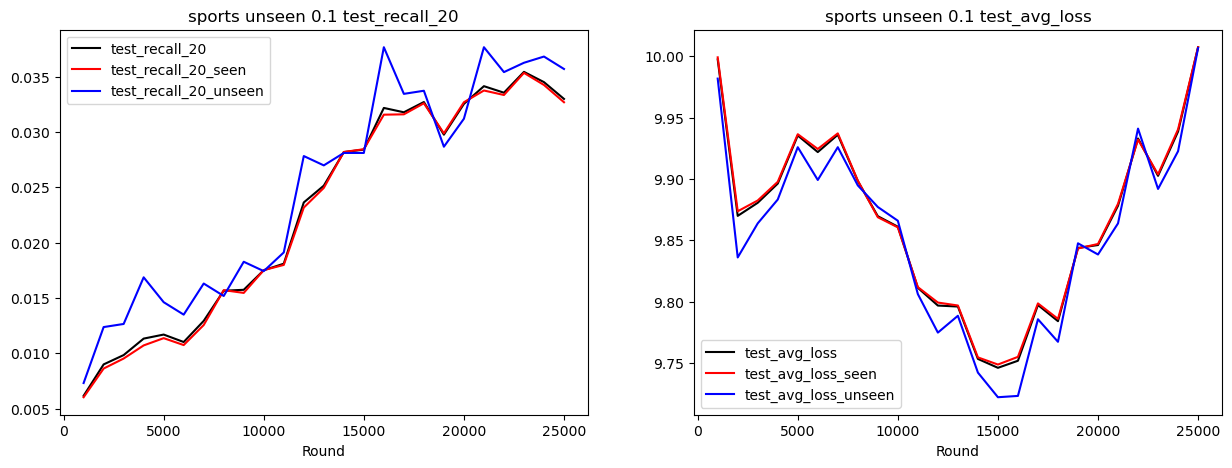

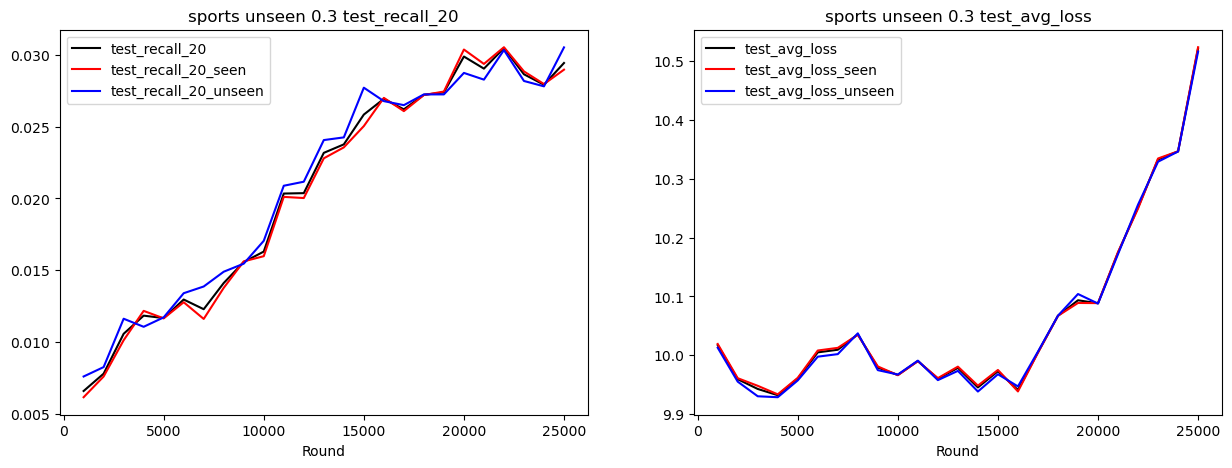

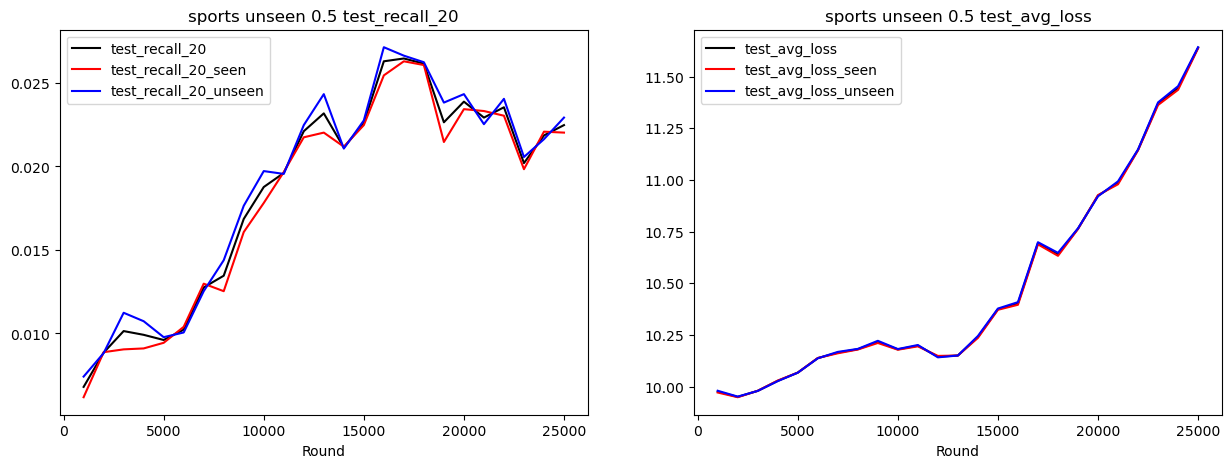

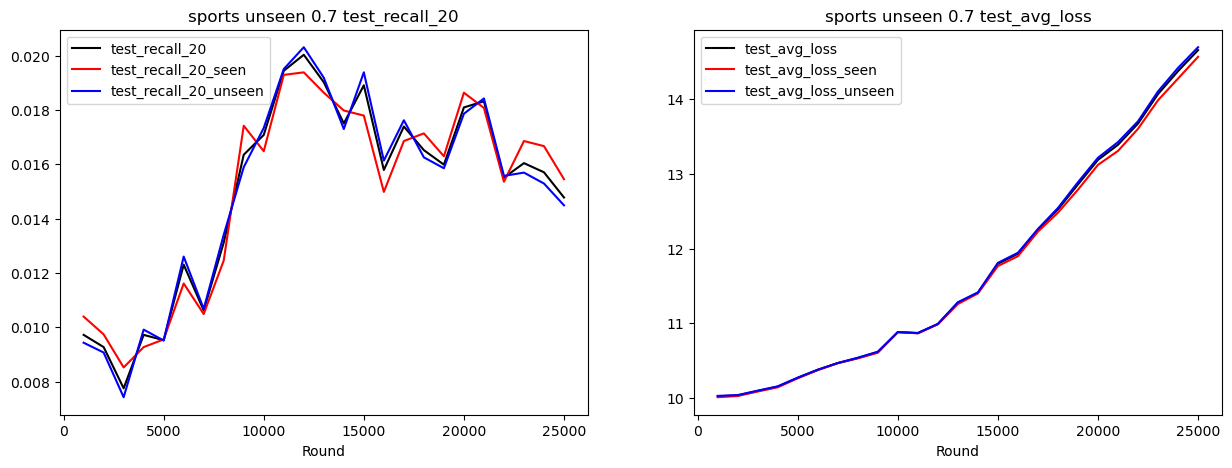

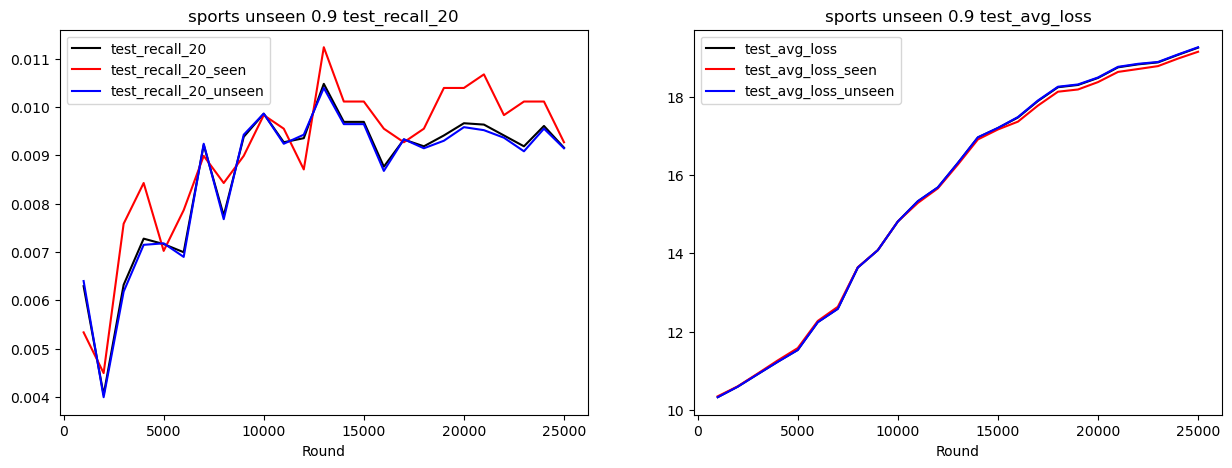

In [5]:
## from evaluation metrics plot the metrics
## and show best results
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

rubics = ['test_recall_20', 'test_avg_loss']
seen_rubics = ['test_recall_20_seen', 'test_avg_loss_seen']
unseen_rubics = ['test_recall_20_unseen', 'test_avg_loss_unseen']

full_participating_test_recall_20 ={
    "ml-1m" : 0.2528,
    "sports": 0.0364,
    "beauty" : 0.0690
}

dataset_unseen_ratios = {
    'ml-1m': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'sports': [0.1, 0.3, 0.5, 0.7, 0.9],
    'beauty': [0.1, 0.3, 0.5, 0.7, 0.9]
}
## print df
columns = ['unseen_ratio', 'test_recall_20', 'test_recall_20_seen', 'test_recall_20_unseen', 'test_avg_loss', 'test_avg_loss_seen', 'test_avg_loss_unseen']
df_dict = {}
for column in columns:
    df_dict[column] = []

for ids, result in enumerate(eval_metrics.values()):
    (best_result, round_via_results) = result
    df_dict['unseen_ratio'].append(dataset_unseen_ratios[dataset_key][ids])
    for column in columns[1:]:
        df_dict[column].append(best_result[column])
df = pd.DataFrame(df_dict)
## print in 4 decimal places
print(df.round(4))        
    
## plot round via results and save the best results as df
path_via_rubics = {}
for dataset_path, result in eval_metrics.items():
    (best_result, round_via_results) = result
    rubic_results = [[] for _ in range(len(rubics))]
    for rubic_id, rubic in enumerate(rubics):
        for i in range(0,len(round_via_results['Round'])):
            rubic_results[rubic_id].append(round_via_results['Results_raw'][i][rubic])
    rubic_results = np.array(rubic_results)
    seen_rubic_results = [[] for _ in range(len(seen_rubics))]
    for rubic_id, seen_rubic in enumerate(seen_rubics):
        for i in range(len(round_via_results['Round'])):
            seen_rubic_results[rubic_id].append(round_via_results['Results_raw'][i][seen_rubic])
    seen_rubic_results = np.array(seen_rubic_results)
    unseen_rubic_results = [[] for _ in range(len(unseen_rubics))]
    for rubic_id, unseen_rubic in enumerate(unseen_rubics):
        for i in range(len(round_via_results['Round'])):
            unseen_rubic_results[rubic_id].append(round_via_results['Results_raw'][i][unseen_rubic])
    unseen_rubic_results = np.array(unseen_rubic_results)
    path_via_rubics[dataset_path] = (rubic_results, seen_rubic_results, unseen_rubic_results)
    
## plot the results
ratio_idx = 0
round_limit = 25

for dataset_path, (rubic_results, seen_rubic_results, unseen_rubic_results) in path_via_rubics.items():
    ## plot in the same canvas with different sub plot
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # Create subplots for Rubic 1 and Rubic 2

    for rubic_id, (current_rubic_all, current_rubic_seen, current_rubic_unseen) in enumerate(zip(rubic_results, seen_rubic_results, unseen_rubic_results)):
        ax = axs[rubic_id]
        ## cut by round limit
        current_rubic_all = current_rubic_all[:round_limit]
        current_rubic_seen = current_rubic_seen[:round_limit]
        current_rubic_unseen = current_rubic_unseen[:round_limit]
        
        ax.plot(round_via_results['Round'][:round_limit], current_rubic_all, label = rubics[rubic_id], color='black')
        ax.plot(round_via_results['Round'][:round_limit], current_rubic_seen, label = seen_rubics[rubic_id], color='red')
        ax.plot(round_via_results['Round'][:round_limit], current_rubic_unseen, label = unseen_rubics[rubic_id], color='blue')
        ax.set_xlabel('Round')
        ax.title.set_text(f"{dataset_key} unseen {dataset_unseen_ratios[dataset_key][ratio_idx]} {rubics[rubic_id]}")
        ax.legend()
        if rubics[rubic_id] == 'test_recall_20':
            ax.axhline(y=full_participating_test_recall_20[dataset_key], color='r', linestyle='--', label='Full Participating')
        
    ratio_idx += 1

   unseen_ratio  test_recall_20  test_recall_20_seen  test_recall_20_unseen  \
0           0.1          0.0284               0.0284                 0.0281   
1           0.3          0.0118               0.0122                 0.0110   
2           0.5          0.0088               0.0089                 0.0088   
3           0.7          0.0097               0.0104                 0.0094   
4           0.9          0.0063               0.0053                 0.0064   

   test_avg_loss  test_avg_loss_seen  test_avg_loss_unseen  
0         9.7461              9.7487                9.7221  
1         9.9324              9.9339                9.9290  
2         9.9497              9.9482                9.9512  
3        10.0194             10.0070               10.0247  
4        10.3279             10.3486               10.3256  


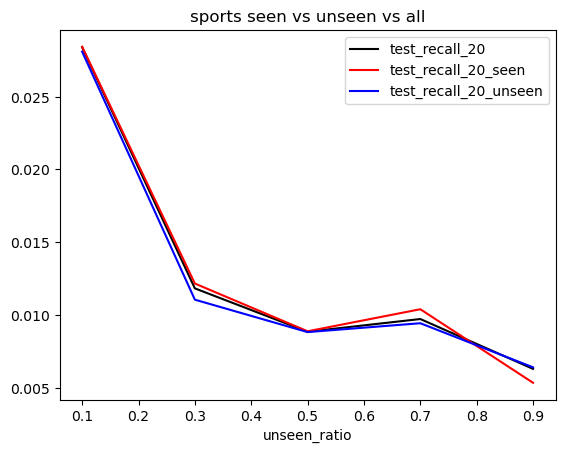

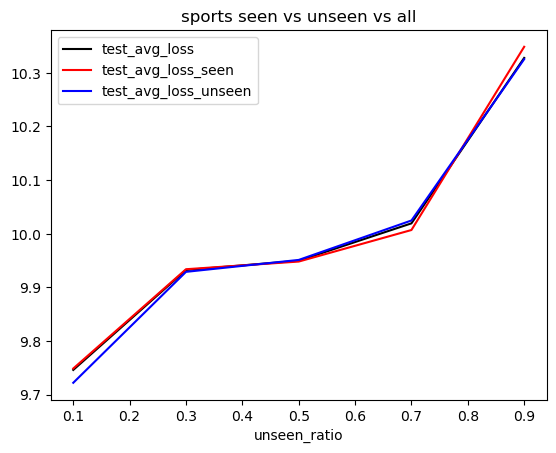

In [6]:
## Compare Via Fair Data Contribution
## Round / (1-Reduced_Ratio) is all Equal
## 1 : 10000 , 0.9 : 9000, 0.8 : 8000, 0.7 : 7000, 0.6 : 6000, 0.5 : 5000, 0.4 : 4000, 0.3 : 3000, 0.2 : 2000, 0.1 : 1000

dataset_round_nums = {
    'ml-1m': [27000, 24000, 21000, 18000, 15000, 12000, 9000, 6000, 3000],
    'sports': [18000, 14000, 10000, 6000, 2000],
    'beauty': [18000, 14000, 10000, 6000, 2000]
}

dataset_unseen_ratios = {
    'ml-1m': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'sports': [0.1, 0.3, 0.5, 0.7, 0.9],
    'beauty': [0.1, 0.3, 0.5, 0.7, 0.9]
}

rubics = ['test_recall_20', 'test_avg_loss']
seen_rubics = ['test_recall_20_seen', 'test_avg_loss_seen']
unseen_rubics = ['test_recall_20_unseen', 'test_avg_loss_unseen']

## print df
columns = ['path', 'test_recall_20', 'test_recall_20_seen', 'test_recall_20_unseen']

df_fair_dict = {}
for column in columns:
    df_fair_dict[column] = []

for (dataset_path, result), round_num in zip(eval_metrics.items(), dataset_round_nums[dataset_key]):
    (best_result, round_via_results) = result
    #print(round_num)
    df_fair_dict['path'].append(dataset_path)
    for column in columns[1:]:
        #print(int(round_num / 1000) - 1)
        df_fair_dict[column].append(round_via_results['Results_raw'][int(round_num / 1000) - 1][column])
        
fair_df = pd.DataFrame(df_dict)
## print in 4 decimal places
print(fair_df.round(4))        


#plot the df

for rubic_all, rubic_seen, rubic_unseen in zip(rubics, seen_rubics, unseen_rubics):
    fig, ax = plt.subplots()
    ax.plot(dataset_unseen_ratios[dataset_key], fair_df[rubic_all], label = rubic_all, color='black')
    ax.plot(dataset_unseen_ratios[dataset_key], fair_df[rubic_seen], label = rubic_seen, color='red')
    ax.plot(dataset_unseen_ratios[dataset_key], fair_df[rubic_unseen], label = rubic_unseen, color='blue')
    ax.set_xlabel('unseen_ratio')
    ax.set_title(f'{dataset_key} seen vs unseen vs all')
    ax.legend()
    plt.show()
